# Libraries & Functions

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from nltk import ngrams, FreqDist
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm

# Input Description Data

## Plants of the World Online - POWO Dataset

In [8]:
df_POWO_combined = pd.read_excel("..//..//Datasets//POWO-GIFT//powo_combined_descriptions_v2_preprocessed.xlsx")

In [9]:
df_POWO_combined

,Unnamed: 0,name,authors,POWO_ids,POWO_id_N,Language,description,QA_description,BERT_description,BOW_description
0,0,Aa argyrolepis,Rchb.f.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb
1,1,Aa colombiana,Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb
2,2,Aa denticulata,Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb
3,3,Aa leucantha,(Rchb.f.) Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb
4,4,Aa maderoi,Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb
...,...,...,...,...,...,...,...,...,...,...
59146,59146,× Agropogon lutosus,(Poir.) P.Fourn.,morphologyReproductiveInflorescenceBractGlume;...,7,en,Glumes persistent; similar; exceeding apex of ...,glumes persistent ; similar ; exceeding apex o...,glumes persistent similar exceeding apex of fl...,glumes persistent similar exceeding apex flore...
59147,59147,× Calicharis butcheri,(Traub) Meerow,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb
59148,59148,× Chrismatopteris holttumii,Quansah & D.S.Edwards,note;morphologyGeneral;morphologyReproductiveS...,3,en,Holttum had annotated _x000D_\n<i>Faden &amp; ...,holttum had annotated faden amp ; evans 70/422...,holttum had annotated faden amp evans in with ...,holttum annotated faden amp evans new name bas...
59149,59149,× Dupoa labradorica,(Steud.) J.Cay. & Darbysh.,morphologyReproductiveInflorescenceBractGlume;...,7,en,Glumes persistent; similar; shorter than spike...,glumes persistent ; similar ; shorter than spi...,glumes persistent similar shorter than spikele...,glumes persistent similar shorter spikelet fir...


## Wikipedia - WIKI Dataset

In [11]:
df_WIKI_combined = pd.read_excel("..//../Datasets//POWO-GIFT//wiki_combined_descriptions_v2_preprocessed.xlsx")

In [12]:
df_WIKI_combined

,Unnamed: 0,name,authors,WIKI_ids,WIKI_id_N,Language,description,QA_description,BERT_description,BOW_description
0,0,Aa achalensis,"Schltr., 1920",Summary;Summary,2,en,Aa achalensis is a species of orchid in the ge...,aa achalensis is a species of orchid in the ge...,aa achalensis is species of orchid in the genu...,aa achalensis species orchid genus aa referenc...
1,1,Aa argyrolepis,"Rchb.f., 1854",Summary;References;Summary;References,4,en,Aa argyrolepis is an orchid in the genus Aa. ...,aa argyrolepis is an orchid in the genus aa . ...,aa argyrolepis is an orchid in the genus aa it...,aa argyrolepis orchid genus aa grows altitudes...
2,2,Aa aurantiaca,D. Trujillo (2011)[1],Summary;Summary,2,en,Aa aurantiaca is a species of orchid in the ge...,aa aurantiaca is a species of orchid in the ge...,aa aurantiaca is species of orchid in the genu...,aa aurantiaca species orchid genus aa native p...
3,3,Aa calceata,"Schltr., 1912",Summary;Summary,2,en,Aa calceata is a species of orchid in the genu...,aa calceata is a species of orchid in the genu...,aa calceata is species of orchid in the genus ...,aa calceata species orchid genus aait found bo...
4,4,Aa colombiana,Schltr.,Summary;Summary,2,en,Aa colombiana is a species of orchid in the ge...,aa colombiana is a species of orchid in the ge...,aa colombiana is species of orchid in the genu...,aa colombiana species orchid genus aa found co...
...,...,...,...,...,...,...,...,...,...,...
55626,55626,Zygosepalum labiosum,(Rich.) C.Schweinf.,Summary;Description,2,en,Zygosepalum labiosum is an epiphytic orchid fo...,zygosepalum labiosum is an epiphytic orchid fo...,zygosepalum labiosum is an epiphytic orchid fo...,zygosepalum labiosum epiphytic orchid found so...
55627,55627,Zygostigma australe,(Cham. & Schltdl.) Griseb.,Summary,1,en,Zygostigma australe is a species of flowering ...,zygostigma australe is a species of flowering ...,zygostigma australe is species of flowering pl...,zygostigma australe species flowering plant fa...
55628,55628,Zygotritonia bongensis,(Pax) Mildbr.,Summary;Morphology;Distribution,3,en,Zygotritonia bongensis is a perennial herb of ...,zygotritonia bongensis is a perennial herb of ...,zygotritonia bongensis is perennial herb of th...,zygotritonia bongensis perennial herb iridacea...
55629,55629,Zyzyxia lundellii,"(H.Robinson) Strother, 1991",Summary;Description and distribution;Naming,3,en,Zyzyxia is a genus of tropical shrubs in the f...,zyzyxia is a genus of tropical shrubs in the f...,zyzyxia is genus of tropical shrubs in the fam...,zyzyxia genus tropical shrubs family asteracea...


# Input Family Data 

## Global Inventory of Floras and Traits - GIFT Dataset

In [19]:
df_GIFT_names = pd.read_csv("..//..//Datasets//GIFT/GIFT_names_matched.csv")

In [21]:
df_GIFT_names = df_GIFT_names[["work_ID", "species", "family"]].drop_duplicates()

In [22]:
df_GIFT_names

,work_ID,species,family
0,1943,Amaranthus interruptus,Amaranthaceae
1,3128,Argusia argentea,Boraginaceae
2,11046,Cordia subcordata,Boraginaceae
3,9985,Cleome gynandra,Cleomaceae
4,23490,Ipomoea violacea,Convolvulaceae
...,...,...,...
990844,360803,Stipella capensis,NaN
991472,381232,Spiesia heratensis,Leguminosae
991520,381274,Acantholimon ahagarense,Plumbaginaceae
991529,381292,Astragalus sangonensis,Leguminosae


# Combine Description & GIFT Data

In [24]:
"""Combine the POWO and GIFT databases regards to their species name and add the wanted traits in df_POWO"""
def combine_POWO_GIFT(df_POWO, df_GIFT):
    df_GIFT["key"] = df_GIFT["species"]
    df_POWO["key"] = df_POWO["name"]
    df_POWO = pd.merge(df_POWO, df_GIFT, how = "left", on = "key")
    df_POWO.drop("key", axis=1, inplace=True)
    return df_POWO

"""Combine the WIKI and GIFT databases regards to their species name and add the wanted traits in df_WIKI"""
def combine_WIKI_GIFT(df_WIKI, df_GIFT):
    df_GIFT["key"] = df_GIFT["species"]
    df_WIKI["key"] = df_WIKI["name"]
    df_WIKI = pd.merge(df_WIKI, df_GIFT, how = "left", on = "key")
    df_WIKI.drop("key", axis=1, inplace=True)
    return df_WIKI

In [37]:
df_POWO_Fam = combine_POWO_GIFT(df_POWO_combined, df_GIFT_names)
df_POWO_Fam = df_POWO_Fam.dropna(subset=['family']).drop(["Unnamed: 0"], axis = 1)
df_POWO_Fam

,name,authors,POWO_ids,POWO_id_N,Language,description,QA_description,BERT_description,BOW_description,work_ID,species,family
0,Aa argyrolepis,Rchb.f.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb,158783.0,Aa argyrolepis,Orchidaceae
1,Aa colombiana,Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb,158785.0,Aa colombiana,Orchidaceae
2,Aa denticulata,Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb,158786.0,Aa denticulata,Orchidaceae
3,Aa leucantha,(Rchb.f.) Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb,158789.0,Aa leucantha,Orchidaceae
4,Aa maderoi,Schltr.,morphologyGeneralHabit,1,es,Hierba,herb,herb,herb,158792.0,Aa maderoi,Orchidaceae
...,...,...,...,...,...,...,...,...,...,...,...,...
59316,Zygostates chaparensis,Toscano & R.Vásquez,vegetativeMultiplicationPseudobulb;morphologyR...,16,en,"Pseudobulb unifoliate, ovoid, 3 – 5 × 2.5 – 3&...","pseudobulb unifoliate , ovoid , 3 - 5 x 2.5 - ...",pseudobulb unifoliate ovoid mm lateral sepals ...,pseudobulb unifoliate ovoid mm lateral sepals ...,165424.0,Zygostates chaparensis,Orchidaceae
59317,Zygotritonia nyassana,Mildbr.,vegetativeMultiplicationCorm;morphologyLeaf;mo...,19,en,Corms 15–20 cm in diameter; tunics of moderate...,corms 15-20 cm in diameter ; tunics of moderat...,corms cm in diameter tunics of moderately coar...,corms cm diameter tunics moderately coarse ret...,153727.0,Zygotritonia nyassana,Iridaceae
59318,Zygotritonia praecox,Stapf,vegetativeMultiplicationCorm;morphologyReprodu...,4,en,"Corm about 1 in. diam., covered with reticulat...","corm about 1 in . diam. , covered with reticul...",corm about in diam covered with reticulatefibr...,corm diam covered reticulatefibrous tunics cap...,153728.0,Zygotritonia praecox,Iridaceae
59319,× Agropogon lutosus,(Poir.) P.Fourn.,morphologyReproductiveInflorescenceBractGlume;...,7,en,Glumes persistent; similar; exceeding apex of ...,glumes persistent ; similar ; exceeding apex o...,glumes persistent similar exceeding apex of fl...,glumes persistent similar exceeding apex flore...,47395.0,× Agropogon lutosus,Poaceae


In [38]:
df_WIKI_Fam = combine_WIKI_GIFT(df_WIKI_combined, df_GIFT_names)
df_WIKI_Fam = df_WIKI_Fam.dropna(subset=['family']).drop(["Unnamed: 0"], axis = 1)
df_WIKI_Fam

,name,authors,WIKI_ids,WIKI_id_N,Language,description,QA_description,BERT_description,BOW_description,work_ID,species,family
0,Aa achalensis,"Schltr., 1920",Summary;Summary,2,en,Aa achalensis is a species of orchid in the ge...,aa achalensis is a species of orchid in the ge...,aa achalensis is species of orchid in the genu...,aa achalensis species orchid genus aa referenc...,102932,Aa achalensis,Orchidaceae
1,Aa argyrolepis,"Rchb.f., 1854",Summary;References;Summary;References,4,en,Aa argyrolepis is an orchid in the genus Aa. ...,aa argyrolepis is an orchid in the genus aa . ...,aa argyrolepis is an orchid in the genus aa it...,aa argyrolepis orchid genus aa grows altitudes...,158783,Aa argyrolepis,Orchidaceae
2,Aa aurantiaca,D. Trujillo (2011)[1],Summary;Summary,2,en,Aa aurantiaca is a species of orchid in the ge...,aa aurantiaca is a species of orchid in the ge...,aa aurantiaca is species of orchid in the genu...,aa aurantiaca species orchid genus aa native p...,163995,Aa aurantiaca,Orchidaceae
3,Aa calceata,"Schltr., 1912",Summary;Summary,2,en,Aa calceata is a species of orchid in the genu...,aa calceata is a species of orchid in the genu...,aa calceata is species of orchid in the genus ...,aa calceata species orchid genus aait found bo...,158784,Aa calceata,Orchidaceae
4,Aa colombiana,Schltr.,Summary;Summary,2,en,Aa colombiana is a species of orchid in the ge...,aa colombiana is a species of orchid in the ge...,aa colombiana is species of orchid in the genu...,aa colombiana species orchid genus aa found co...,158785,Aa colombiana,Orchidaceae
...,...,...,...,...,...,...,...,...,...,...,...,...
55778,Zygosepalum labiosum,(Rich.) C.Schweinf.,Summary;Description,2,en,Zygosepalum labiosum is an epiphytic orchid fo...,zygosepalum labiosum is an epiphytic orchid fo...,zygosepalum labiosum is an epiphytic orchid fo...,zygosepalum labiosum epiphytic orchid found so...,116592,Zygosepalum labiosum,Orchidaceae
55779,Zygostigma australe,(Cham. & Schltdl.) Griseb.,Summary,1,en,Zygostigma australe is a species of flowering ...,zygostigma australe is a species of flowering ...,zygostigma australe is species of flowering pl...,zygostigma australe species flowering plant fa...,102870,Zygostigma australe,Gentianaceae
55780,Zygotritonia bongensis,(Pax) Mildbr.,Summary;Morphology;Distribution,3,en,Zygotritonia bongensis is a perennial herb of ...,zygotritonia bongensis is a perennial herb of ...,zygotritonia bongensis is perennial herb of th...,zygotritonia bongensis perennial herb iridacea...,78048,Zygotritonia bongensis,Iridaceae
55781,Zyzyxia lundellii,"(H.Robinson) Strother, 1991",Summary;Description and distribution;Naming,3,en,Zyzyxia is a genus of tropical shrubs in the f...,zyzyxia is a genus of tropical shrubs in the f...,zyzyxia is genus of tropical shrubs in the fam...,zyzyxia genus tropical shrubs family asteracea...,352453,Zyzyxia lundellii,Compositae


## Save Data

In [39]:
df_POWO_Fam.to_excel("Datasets//POWO_Family.xlsx", index = False)
df_WIKI_Fam.to_excel("Datasets//WIKI_Family.xlsx", index = False)

# Family Statistics

In [41]:
for df, df_name in zip([df_POWO_Fam, df_WIKI_Fam], ["POWO", "WIKI"]):
    print(df_name)
    print("\tNumber of Unique Species: {}".format(df["name"].nunique()))
    print("\tNumber of Unique Families: {}".format(df["family"].nunique()))

POWO
	Number of Unique Species: 54378
	Number of Unique Families: 339
WIKI
	Number of Unique Species: 55584
	Number of Unique Families: 445


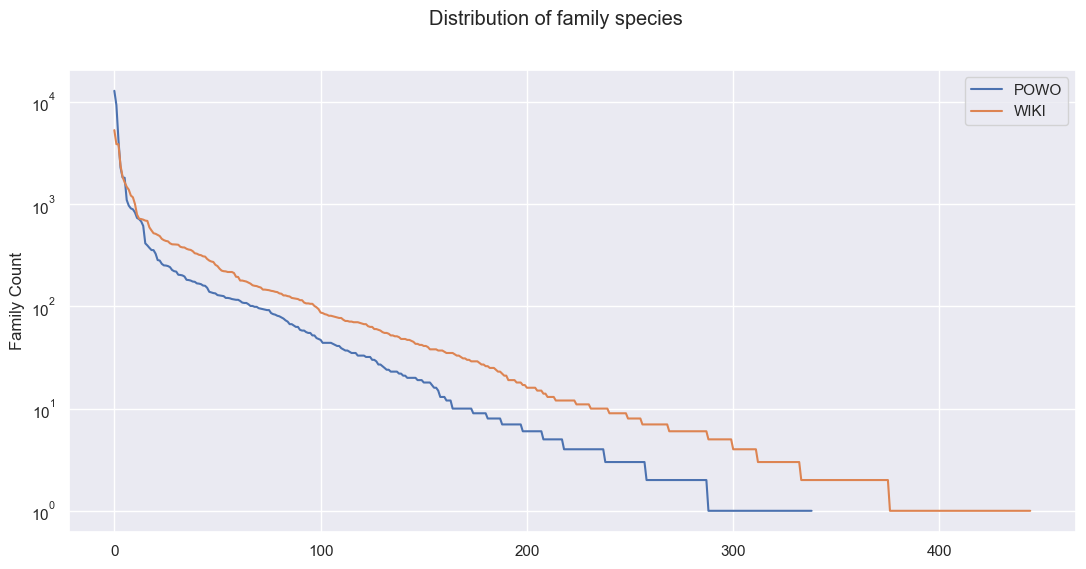

In [50]:
fig, ax = plt.subplots(figsize=(13,6), nrows = 1)
plt.suptitle("Distribution of family species")
plt.ylabel("Family Count")
plt.plot(df_POWO_Fam["family"].value_counts().values, label = "POWO")
plt.plot(df_WIKI_Fam["family"].value_counts().values, label = "WIKI")
plt.yscale("log")
plt.legend()
plt.show()

In [54]:
print("Number of families with more than 50 descriptions:")
print("POWO", np.sum(df_POWO_Fam["family"].value_counts().values>=100))
print("WIKI", np.sum(df_WIKI_Fam["family"].value_counts().values>=100))

Number of families with more than 50 descriptions:
POWO 68
WIKI 98
